In [47]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

seaborn.set()

NOISE_LEVELS = [0, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

Populating the interactive namespace from numpy and matplotlib


In [31]:
import numpy as np
np.concatenate([np.arange(0, 0.05, 0.005), np.arange(0.05, 0.2, 0.01)])

array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
        0.04 ,  0.045,  0.05 ,  0.06 ,  0.07 ,  0.08 ,  0.09 ,  0.1  ,
        0.11 ,  0.12 ,  0.13 ,  0.14 ,  0.15 ,  0.16 ,  0.17 ,  0.18 ,
        0.19 ,  0.2  ])

In [4]:
results = pd.read_csv('conll_noembed.csv', index_col=0)
results.columns

Index(['batch_size', 'char_embeddings_dim', 'clean_f1',
       'clean_n_predicted_entities', 'clean_n_true_entities',
       'clean_precision', 'clean_recall', 'dropout_rate', 'embeddings_dropout',
       'epochs', 'filter_width', 'learning_rate', 'learning_rate_decay',
       'n_filters', 'net_type', 'noise_level', 'noised_f1',
       'noised_n_predicted_entities', 'noised_n_true_entities',
       'noised_precision', 'noised_recall', 'token_embeddings_dim',
       'use_batch_norm', 'use_capitalization', 'use_crf'],
      dtype='object')

In [3]:
results.sample(2)

,batch_size,char_embeddings_dim,clean_f1,clean_n_predicted_entities,clean_n_true_entities,clean_precision,clean_recall,dropout_rate,embeddings_dropout,epochs,...,noise_level,noised_f1,noised_n_predicted_entities,noised_n_true_entities,noised_precision,noised_recall,token_embeddings_dim,use_batch_norm,use_capitalization,use_crf
6,8,25,81.092049,5194,5648,84.636119,77.832861,0.5,True,5,...,0.125,69.243986,4828,5648,75.124275,64.217422,300,True,False,True
4,8,25,81.062937,5077,5648,85.621430,76.965297,0.5,True,5,...,0.075,72.784932,4758,5648,79.592266,67.050283,300,True,False,True


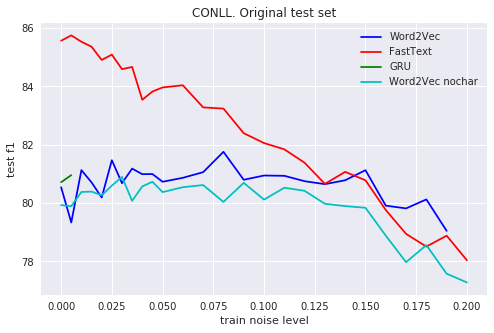

In [59]:
plt.figure(figsize=(8, 5))
plt.title('CONLL. Original test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('conll_noembed_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='b', label='Word2Vec')

results = pd.read_csv('conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='r', label='FastText')

results = pd.read_csv('conll_noembed_gru.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='g', label='GRU')

results = pd.read_csv('conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word2Vec nochar')

# results = pd.read_csv('conll.csv', index_col=0)
# results.sort_values('noise_level', inplace=True)
# plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word')


plt.legend()

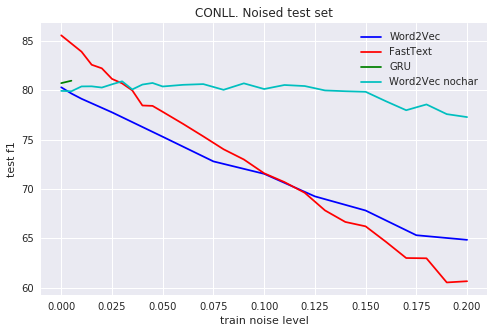

In [58]:
plt.figure(figsize=(8, 5))
plt.title('CONLL. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')

results = pd.read_csv('conll_noembed.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'], color='b', label='Word2Vec')

results = pd.read_csv('conll_FastText_moreNL.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'], color='r', label='FastText')

results = pd.read_csv('conll_noembed_gru.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='g', label='GRU')

results = pd.read_csv('conll_noembed_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['clean_f1'], color='c', label='Word2Vec nochar')


plt.legend()